In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END


In [3]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    final_result: int

In [27]:
def adder(state: AgentState) -> AgentState:
    state["final_result"] = state["number1"] + state["number2"]
    return state

def subtractor(state: AgentState) -> AgentState:
    state["final_result"] = state["number1"] - state["number2"]
    return state

def multiplier(state: AgentState) -> AgentState:
    state["final_result"] = state["number1"] * state["number2"]
    return state


def decide_next_node(state: AgentState) -> str:
    if state["operation"] == "+":
        return "adder_operation"
    elif state["operation"] == "-":
        return "subtractor_operation"
    elif state["operation"] == "*":
        return "multiplier_operation"

In [28]:
graph = StateGraph(AgentState)

graph.add_node("adder_node", adder)
graph.add_node("subtractor_node", subtractor)
graph.add_node("multiplier_node", multiplier)

graph.add_node("decide_next_node", lambda state: state) # pass through function

graph.add_edge(START, "decide_next_node")

graph.add_conditional_edges(
    "decide_next_node", 
    decide_next_node, # action function
    {
        # Edge : Node
        "adder_operation": "adder_node",
        "subtractor_operation": "subtractor_node",
        "multiplier_operation": "multiplier_node",
    }
)   

graph.add_edge("adder_node", END)
graph.add_edge("subtractor_node", END)
graph.add_edge("multiplier_node", END)

app = graph.compile()

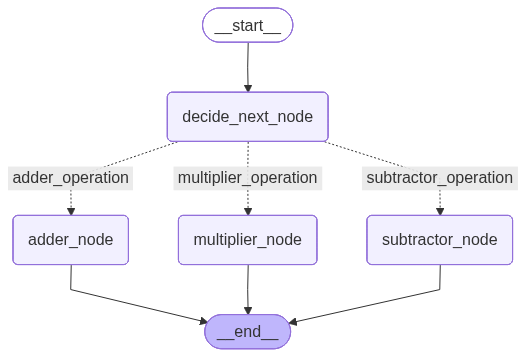

In [29]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [30]:
res = app.invoke({"number1": 1, "operation": "+", "number2": 2})

In [31]:
print(res)

{'number1': 1, 'operation': '+', 'number2': 2, 'final_result': 3}
